<a href="https://colab.research.google.com/github/ReminJoby/Quantum/blob/main/Superdensecoding_VS_Classical_error_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=3cc0adab2e81c613b59eb7edec6c7aa171da1273dff3855cb31fd6b3c7bb7e98
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


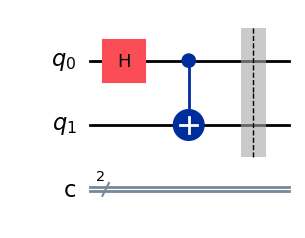

In [ ]:
# Superdense Coding
%matplotlib inline
!pip install pylatexenc #install pylatexenc if not already present
from qiskit import *

# Step 0: Prepare the Bell State
bell_circuit = QuantumCircuit(2, 2)
bell_circuit.h(0)
bell_circuit.cx(0, 1)
bell_circuit.barrier()
bell_circuit.draw(output="mpl")

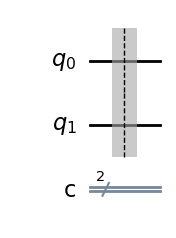

In [ ]:
# Step 1: Prepare Alice circuits depending on b0b1

# Case 00: the circuit has no gates
alice_00 = QuantumCircuit(2, 2)
alice_00.barrier()
alice_00.draw(output="mpl")

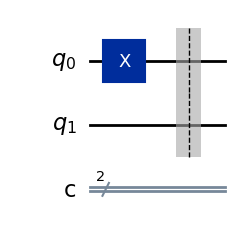

In [ ]:
# Case 01: the circuit has the X gate
alice_01 = QuantumCircuit(2, 2)
alice_01.x(0)
alice_01.barrier()
alice_01.draw(output="mpl")

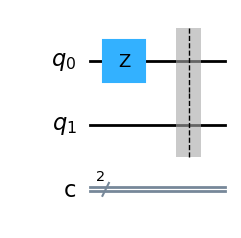

In [ ]:
# Case 10: the circuit has the Z gate
alice_10 = QuantumCircuit(2, 2)
alice_10.z(0)
alice_10.barrier()
alice_10.draw(output="mpl")

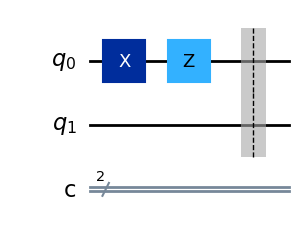

In [ ]:
# Case 11: the circuit has the X gate and then Z gate
alice_11 = QuantumCircuit(2, 2)
alice_11.x(0)
alice_11.z(0)
alice_11.barrier()
alice_11.draw(output="mpl")

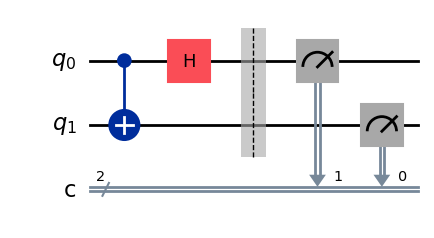

In [ ]:
# Step 2: Apply the inverted entanglement circuit, and then measure
invert_circuit = QuantumCircuit(2, 2)
invert_circuit.cx(0, 1)
invert_circuit.h(0)
invert_circuit.barrier()
invert_circuit.measure([0, 1], [1, 0])  # Qiskit measures are always reversed, b1b0 not b0b1
invert_circuit.draw(output="mpl")

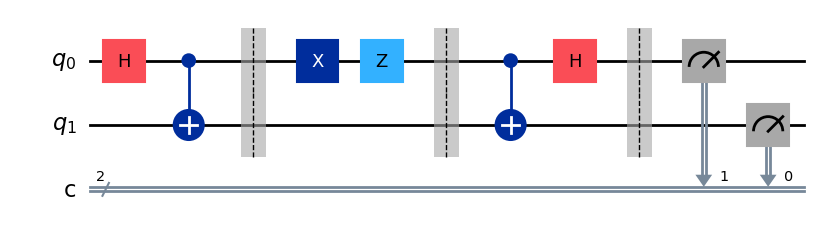

In [ ]:
# Compose the circuits
full_circuit = bell_circuit.compose(alice_11).compose(invert_circuit)

# Draw the final circuit
full_circuit.draw(output="mpl")

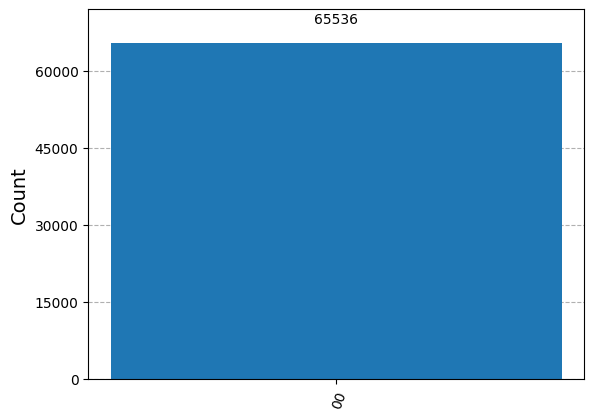

In [ ]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

def simulate_circuit_no_measure(prep, encoding, decoding):
    """Simulates the circuit without classical bits or measurements."""
    # Remove any measurement operations from the circuits
    prep.remove_final_measurements()
    encoding.remove_final_measurements()
    decoding.remove_final_measurements()

    # Combine the circuits using compose
    circuit = prep.compose(encoding).compose(decoding)

    # Simulate the final statevector
    state = Statevector.from_instruction(circuit)

    # Manually sample measurement outcomes from the statevector
    counts = state.sample_counts(shots=2**16)

    return counts

# For 00
count_00 = simulate_circuit_no_measure(bell_circuit, alice_00, invert_circuit)

# Plot the histogram
plot_histogram(count_00)

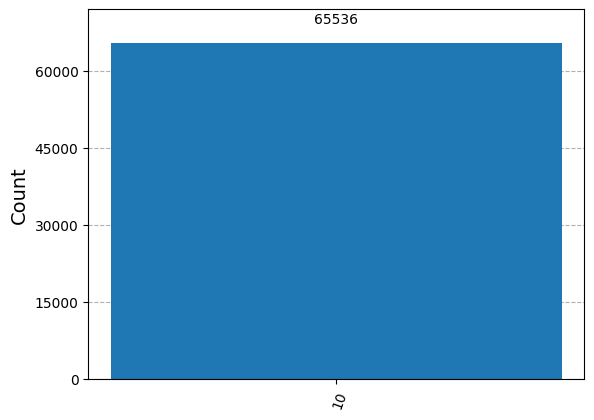

In [ ]:
from qiskit.visualization import plot_histogram

# For 01
count_01 = simulate_circuit(bell_circuit, alice_01, invert_circuit)

# Plot the histogram
plot_histogram(count_01)

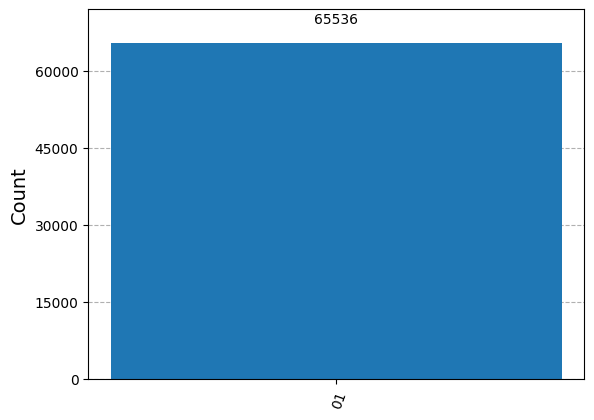

In [ ]:
# For 10
count_10 = simulate_circuit(bell_circuit, alice_10, invert_circuit)

# Plot the histogram
plot_histogram(count_10)

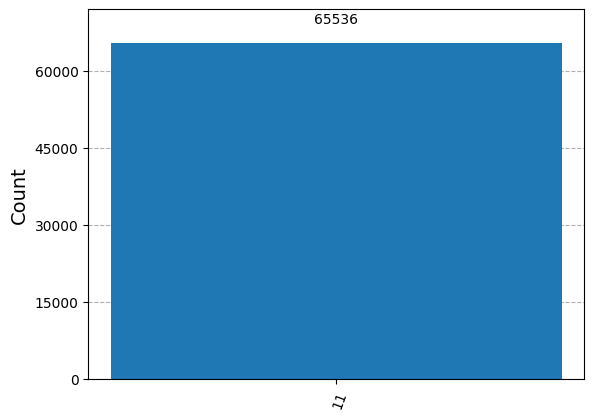

In [ ]:
# For 11
count_11 = simulate_circuit(bell_circuit, alice_11, invert_circuit)

# Plot the histogram
plot_histogram(count_11)

In [1]:
# Add the Hamming (7,4) Error Correction Functions after the quantum superdense coding part

def hamming_74_encode(data_bits):
    """
    Encodes 4 bits of data into a 7-bit Hamming (7,4) code.
    Returns the 7-bit codeword.
    """
    d1, d2, d3, d4 = data_bits
    p1 = d1 ^ d2 ^ d4  # Parity bit 1
    p2 = d1 ^ d3 ^ d4  # Parity bit 2
    p3 = d2 ^ d3 ^ d4  # Parity bit 3

    # Codeword: 7 bits
    return [p1, p2, d1, p3, d2, d3, d4]

def hamming_74_decode(codeword):
    """
    Decodes the 7-bit Hamming codeword and corrects single-bit errors.
    Returns the corrected 4-bit data.
    """
    p1, p2, d1, p3, d2, d3, d4 = codeword

    # Calculate syndrome bits
    s1 = p1 ^ d1 ^ d2 ^ d4
    s2 = p2 ^ d1 ^ d3 ^ d4
    s3 = p3 ^ d2 ^ d3 ^ d4

    # Syndrome vector
    syndrome = (s1, s2, s3)

    # Error detection and correction based on syndrome
    error_position = int(''.join(map(str, syndrome)), 2)  # Convert binary to decimal

    if error_position != 0:
        # Correct the error in the respective bit (1-based index)
        codeword[error_position - 1] ^= 1

    # Return the corrected data bits
    return [d1, d2, d3, d4]

# Example: Encode and Decode using Hamming (7,4)

# Data bits (4 bits)
data_bits = [1, 0, 1, 1]  # Example data

# Encode
encoded_bits = hamming_74_encode(data_bits)
print("Encoded (7,4) Hamming Code:", encoded_bits)

# Simulate an error in the 3rd bit (introducing a bit-flip)
encoded_bits[2] ^= 1  # Flip the 3rd bit
print("Corrupted Codeword:", encoded_bits)

# Decode and correct
corrected_data = hamming_74_decode(encoded_bits)
print("Corrected Data Bits:", corrected_data)


Encoded (7,4) Hamming Code: [0, 1, 1, 0, 0, 1, 1]
Corrupted Codeword: [0, 1, 0, 0, 0, 1, 1]
Corrected Data Bits: [0, 0, 1, 1]


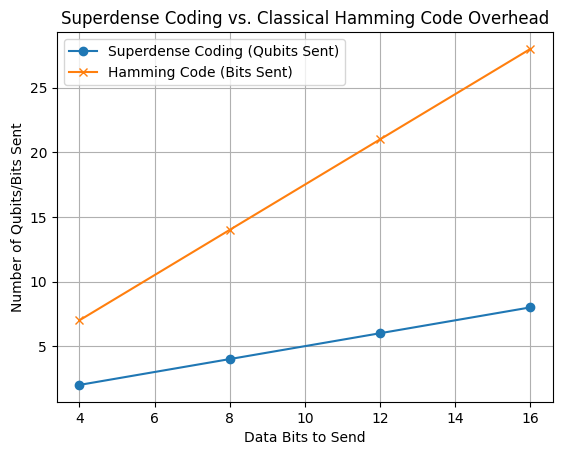

In [2]:
import matplotlib.pyplot as plt

# Data
bits_to_send = [4, 8, 12, 16]  # Number of actual data bits
superdense_qubits = [bits // 2 for bits in bits_to_send]  # Superdense Coding: 1 qubit for 2 classical bits
hamming_bits = [7 * (bits // 4) for bits in bits_to_send]  # Hamming Code: 7 bits for every 4 data bits

# Plot
plt.plot(bits_to_send, superdense_qubits, label='Superdense Coding (Qubits Sent)', marker='o')
plt.plot(bits_to_send, hamming_bits, label='Hamming Code (Bits Sent)', marker='x')

plt.title('Superdense Coding vs. Classical Hamming Code Overhead')
plt.xlabel('Data Bits to Send')
plt.ylabel('Number of Qubits/Bits Sent')
plt.legend()
plt.grid(True)
plt.show()
